<a href="https://colab.research.google.com/github/ram-shankar58/Anamoly-detector/blob/main/Random%20Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

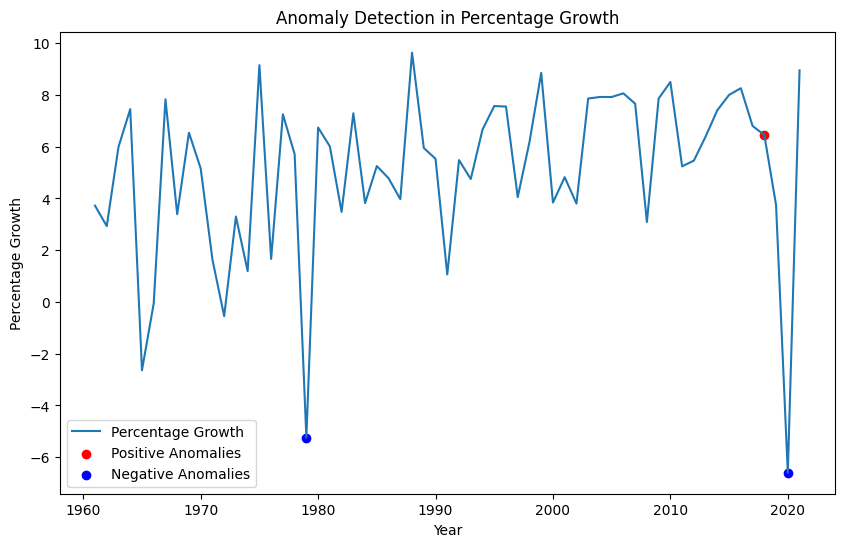

In [28]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Read the data from the CSV file
data = pd.read_csv('India_GDP_Data.csv')

# Features for the Random Forest model
features = data[['GDP_In_Billion_USD', 'Per_Capita_in_USD']]

# Target variable (Percentage_Growth)
target = data['Percentage_Growth ']  # Note the space in the column name

# Initialize and train the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(features, target)

# Predict values using the Random Forest model
predicted_values = rf.predict(features)

# Calculate residuals (difference between predicted and actual values)
residuals = target - predicted_values

# Define a threshold for anomaly detection based on residual errors
threshold = 3.2  # Adjust the threshold as needed

# Find potential anomalies above and below the trend based on the threshold
potential_positive_anomalies = data[residuals > threshold]
potential_negative_anomalies = data[residuals < -threshold]

# Plot the 'Percentage_Growth' data with potential anomalies highlighted
plt.figure(figsize=(10, 6))
plt.plot(data['Year'], data['Percentage_Growth '], label='Percentage Growth')
plt.scatter(potential_positive_anomalies['Year'], potential_positive_anomalies['Percentage_Growth '], color='red', label='Positive Anomalies')
plt.scatter(potential_negative_anomalies['Year'], potential_negative_anomalies['Percentage_Growth '], color='blue', label='Negative Anomalies')
plt.xlabel('Year')
plt.ylabel('Percentage Growth')
plt.title('Anomaly Detection in Percentage Growth')
plt.legend()
plt.show()

